In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model,model_selection,preprocessing,tree,ensemble,metrics,svm
import catboost
import xgboost as xgb

In [2]:
train_data = pd.read_csv('train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data = pd.read_csv('test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
all_data = pd.concat([train_data,test_data],axis = 0)
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
all_data = all_data.reset_index(drop = True)
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
data = all_data.drop(['PassengerId','Cabin'],axis = 1)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
data.isna().sum().sort_values(ascending = False)

Survived    418
Age         263
Embarked      2
Fare          1
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64

In [9]:
data[data['Fare'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [10]:
data[data['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


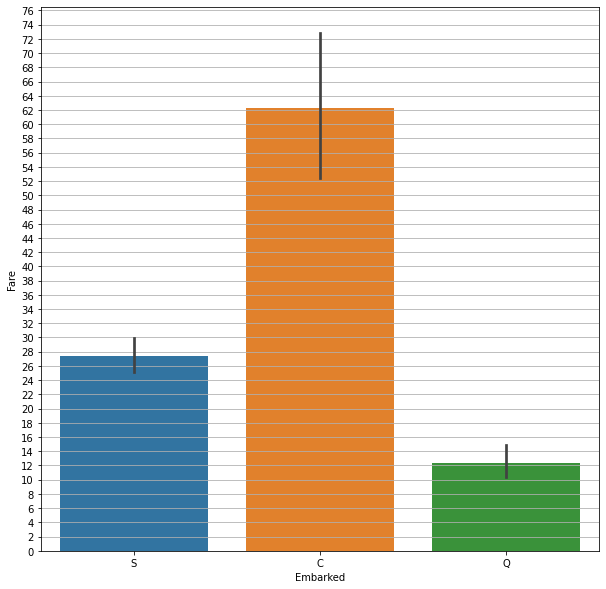

In [11]:
plt.figure(figsize = (10,10))
plt.grid(which = 'major')
plt.yticks(ticks = [2 * i for i in range(40)])
result = sns.barplot(x = 'Embarked',y = 'Fare',data = data)

In [12]:
data['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

In [13]:
unique_tickets = data['Ticket'].unique()
data[data['Ticket'] == '110152']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
257,1.0,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,S
504,1.0,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,S
759,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,S


In [14]:
ticket_group = data.groupby('Ticket').groups
family_tickets = {}
for i in ticket_group.keys():
    if len(ticket_group[i]) >= 2:
        family_tickets[i] = ticket_group[i]
data.iloc[family_tickets['PC 17569'],:]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
31,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C
195,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,C
1207,NaN,1,"Spencer, Mr. William Augustus",male,57.0,1,0,PC 17569,146.5208,C


In [15]:
# a = 0
# for i in family_tickets.keys():
#     if data[['Parch']].values[family_tickets[i]].any():
#         if np.isnan(data['Age'].values[family_tickets[i]]).any():
#             print(a,family_tickets[i])
#             print(data[['Survived','Name','Age','Sex','SibSp','Parch','Ticket','Fare','Embarked']].values[family_tickets[i]])
#             a += 1
#a = 5 age = 38.5 index = 140
#a = 7 age = 8.5 index = 1235

In [16]:
# a = 0
# for i in family_tickets.keys():
#     if data[['SibSp']].values[family_tickets[i]].any():
#         if np.isnan(data['Age'].values[family_tickets[i]]).any():
#             print(a, family_tickets[i])
#             print(data[['Survived','Name','Age','Sex','SibSp','Parch','Ticket','Fare','Embarked']].values[family_tickets[i]])
#             a += 1
# a = 1 age = 46.5 index = 849 change to 44.5
# a = 2 age = 38.5 index = 457 change to 36.5 or 37.5
# a = 3 age = 44.5 index = 669 cahnge to 43.5
# a = 7 age = 14.5 index =  240
# a = 9 age = 38.5 index = 140
# a = 19 age = 8.5 index = 1235
# a = 22 age = 55.5 index = 31 change to 52.5
# a = 23 age = 24.5 index = 375 change to 23.5
# a = 24 age = 45.5 index = 334 

In [17]:
data.isna().sum().sort_values(ascending = False)

Survived    418
Age         263
Embarked      2
Fare          1
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64

In [18]:
data.loc[849,'Age'] = 44.5
data.loc[[457,140],'Age'] = 37.5
data.loc[669,'Age'] = 43.5
data.loc[240,'Age'] = 14.5
data.loc[1235,'Age'] = 8.5
data.loc[31,'Age'] = 52.5
data.loc[375,'Age'] = 23.5
data.loc[334,'Age'] = 45.5

data['Embarked'].fillna('C',inplace = True)
data['Fare'].fillna(27.41,inplace = True)

data.isna().sum().sort_values(ascending = False)

Survived    418
Age         254
Embarked      0
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64

In [19]:
age_data_train = data.drop(['Survived'],axis = 1).dropna()
temp_data = data.drop(['Survived'],axis = 1)
age_data_test = temp_data[temp_data['Age'].isna()]
age_data_train.shape,age_data_test.shape

((1055, 9), (254, 9))

In [20]:
x_train = age_data_train.drop('Age',axis = 1).values[:,:]
y_train = age_data_train['Age'].values[:]
x_test = age_data_test.drop('Age',axis = 1).values[:,:]

age_model = catboost.CatBoostRegressor(cat_features = [1,2,5,7])
age_model.fit(x_train,y_train)
y_pred_1 = age_model.predict(x_test)


Learning rate set to 0.039404
0:	learn: 14.2892163	total: 196ms	remaining: 3m 16s
1:	learn: 14.1474819	total: 229ms	remaining: 1m 54s
2:	learn: 14.0187897	total: 265ms	remaining: 1m 28s
3:	learn: 13.8823572	total: 296ms	remaining: 1m 13s
4:	learn: 13.7671261	total: 327ms	remaining: 1m 5s
5:	learn: 13.6859991	total: 355ms	remaining: 58.7s
6:	learn: 13.5867138	total: 367ms	remaining: 52s
7:	learn: 13.5048607	total: 369ms	remaining: 45.7s
8:	learn: 13.4169415	total: 397ms	remaining: 43.7s
9:	learn: 13.3293281	total: 447ms	remaining: 44.2s
10:	learn: 13.2416650	total: 473ms	remaining: 42.6s
11:	learn: 13.1754007	total: 512ms	remaining: 42.2s
12:	learn: 13.1152319	total: 537ms	remaining: 40.7s
13:	learn: 13.0405154	total: 579ms	remaining: 40.8s
14:	learn: 12.9683140	total: 591ms	remaining: 38.8s
15:	learn: 12.9024934	total: 625ms	remaining: 38.5s
16:	learn: 12.8518171	total: 644ms	remaining: 37.2s
17:	learn: 12.7987397	total: 672ms	remaining: 36.6s
18:	learn: 12.7413406	total: 688ms	remaini

169:	learn: 10.9638422	total: 3.83s	remaining: 18.7s
170:	learn: 10.9608912	total: 3.86s	remaining: 18.7s
171:	learn: 10.9589770	total: 3.88s	remaining: 18.7s
172:	learn: 10.9550953	total: 3.9s	remaining: 18.6s
173:	learn: 10.9490542	total: 3.94s	remaining: 18.7s
174:	learn: 10.9419988	total: 3.95s	remaining: 18.6s
175:	learn: 10.9320189	total: 3.99s	remaining: 18.7s
176:	learn: 10.9174238	total: 4s	remaining: 18.6s
177:	learn: 10.9173995	total: 4.01s	remaining: 18.5s
178:	learn: 10.9128356	total: 4.04s	remaining: 18.5s
179:	learn: 10.9087389	total: 4.05s	remaining: 18.4s
180:	learn: 10.9066721	total: 4.06s	remaining: 18.4s
181:	learn: 10.9066622	total: 4.06s	remaining: 18.3s
182:	learn: 10.9019037	total: 4.08s	remaining: 18.2s
183:	learn: 10.8890633	total: 4.1s	remaining: 18.2s
184:	learn: 10.8851216	total: 4.13s	remaining: 18.2s
185:	learn: 10.8788790	total: 4.15s	remaining: 18.2s
186:	learn: 10.8787342	total: 4.16s	remaining: 18.1s
187:	learn: 10.8695130	total: 4.18s	remaining: 18.1

328:	learn: 10.3384016	total: 7.42s	remaining: 15.1s
329:	learn: 10.3371375	total: 7.43s	remaining: 15.1s
330:	learn: 10.3333065	total: 7.43s	remaining: 15s
331:	learn: 10.3320234	total: 7.46s	remaining: 15s
332:	learn: 10.3293869	total: 7.49s	remaining: 15s
333:	learn: 10.3283548	total: 7.5s	remaining: 15s
334:	learn: 10.3241676	total: 7.53s	remaining: 14.9s
335:	learn: 10.3201987	total: 7.53s	remaining: 14.9s
336:	learn: 10.3199722	total: 7.55s	remaining: 14.8s
337:	learn: 10.3194717	total: 7.57s	remaining: 14.8s
338:	learn: 10.3184523	total: 7.61s	remaining: 14.8s
339:	learn: 10.3175161	total: 7.62s	remaining: 14.8s
340:	learn: 10.3125241	total: 7.65s	remaining: 14.8s
341:	learn: 10.3122141	total: 7.65s	remaining: 14.7s
342:	learn: 10.3106389	total: 7.67s	remaining: 14.7s
343:	learn: 10.3073048	total: 7.68s	remaining: 14.7s
344:	learn: 10.3036209	total: 7.69s	remaining: 14.6s
345:	learn: 10.3024149	total: 7.72s	remaining: 14.6s
346:	learn: 10.3004067	total: 7.75s	remaining: 14.6s
34

487:	learn: 9.8897807	total: 11.2s	remaining: 11.8s
488:	learn: 9.8837978	total: 11.3s	remaining: 11.8s
489:	learn: 9.8822436	total: 11.3s	remaining: 11.7s
490:	learn: 9.8770342	total: 11.3s	remaining: 11.7s
491:	learn: 9.8764273	total: 11.3s	remaining: 11.7s
492:	learn: 9.8758003	total: 11.4s	remaining: 11.7s
493:	learn: 9.8729477	total: 11.4s	remaining: 11.7s
494:	learn: 9.8665297	total: 11.4s	remaining: 11.6s
495:	learn: 9.8631599	total: 11.4s	remaining: 11.6s
496:	learn: 9.8613108	total: 11.5s	remaining: 11.6s
497:	learn: 9.8595607	total: 11.5s	remaining: 11.6s
498:	learn: 9.8583106	total: 11.5s	remaining: 11.6s
499:	learn: 9.8576445	total: 11.5s	remaining: 11.5s
500:	learn: 9.8550484	total: 11.6s	remaining: 11.5s
501:	learn: 9.8537261	total: 11.6s	remaining: 11.5s
502:	learn: 9.8522112	total: 11.6s	remaining: 11.5s
503:	learn: 9.8400340	total: 11.7s	remaining: 11.5s
504:	learn: 9.8399121	total: 11.7s	remaining: 11.5s
505:	learn: 9.8387911	total: 11.7s	remaining: 11.4s
506:	learn: 

649:	learn: 9.5096790	total: 15.2s	remaining: 8.21s
650:	learn: 9.5088404	total: 15.3s	remaining: 8.19s
651:	learn: 9.5072793	total: 15.3s	remaining: 8.18s
652:	learn: 9.5067054	total: 15.3s	remaining: 8.15s
653:	learn: 9.5037859	total: 15.4s	remaining: 8.14s
654:	learn: 9.5024857	total: 15.4s	remaining: 8.11s
655:	learn: 9.5009052	total: 15.4s	remaining: 8.08s
656:	learn: 9.5004804	total: 15.4s	remaining: 8.05s
657:	learn: 9.4995413	total: 15.5s	remaining: 8.04s
658:	learn: 9.4992574	total: 15.5s	remaining: 8.02s
659:	learn: 9.4963439	total: 15.5s	remaining: 8s
660:	learn: 9.4955583	total: 15.6s	remaining: 7.98s
661:	learn: 9.4944150	total: 15.6s	remaining: 7.96s
662:	learn: 9.4938408	total: 15.6s	remaining: 7.93s
663:	learn: 9.4824737	total: 15.6s	remaining: 7.91s
664:	learn: 9.4820361	total: 15.6s	remaining: 7.88s
665:	learn: 9.4789282	total: 15.7s	remaining: 7.86s
666:	learn: 9.4768309	total: 15.7s	remaining: 7.83s
667:	learn: 9.4765490	total: 15.7s	remaining: 7.81s
668:	learn: 9.4

809:	learn: 9.2313702	total: 19.4s	remaining: 4.55s
810:	learn: 9.2275027	total: 19.4s	remaining: 4.53s
811:	learn: 9.2246351	total: 19.5s	remaining: 4.5s
812:	learn: 9.2225578	total: 19.5s	remaining: 4.48s
813:	learn: 9.2218884	total: 19.5s	remaining: 4.46s
814:	learn: 9.2212772	total: 19.6s	remaining: 4.44s
815:	learn: 9.2205182	total: 19.6s	remaining: 4.41s
816:	learn: 9.2193338	total: 19.6s	remaining: 4.39s
817:	learn: 9.2140846	total: 19.6s	remaining: 4.37s
818:	learn: 9.2110604	total: 19.7s	remaining: 4.34s
819:	learn: 9.2109114	total: 19.7s	remaining: 4.32s
820:	learn: 9.2018843	total: 19.7s	remaining: 4.3s
821:	learn: 9.2004775	total: 19.7s	remaining: 4.27s
822:	learn: 9.1932014	total: 19.8s	remaining: 4.25s
823:	learn: 9.1924496	total: 19.8s	remaining: 4.22s
824:	learn: 9.1920783	total: 19.8s	remaining: 4.2s
825:	learn: 9.1920453	total: 19.8s	remaining: 4.17s
826:	learn: 9.1889726	total: 19.9s	remaining: 4.15s
827:	learn: 9.1865683	total: 19.9s	remaining: 4.13s
828:	learn: 9.1

970:	learn: 8.9399509	total: 23.8s	remaining: 709ms
971:	learn: 8.9390311	total: 23.8s	remaining: 685ms
972:	learn: 8.9371203	total: 23.8s	remaining: 661ms
973:	learn: 8.9368025	total: 23.8s	remaining: 636ms
974:	learn: 8.9358620	total: 23.8s	remaining: 611ms
975:	learn: 8.9349003	total: 23.9s	remaining: 587ms
976:	learn: 8.9341121	total: 23.9s	remaining: 562ms
977:	learn: 8.9313235	total: 23.9s	remaining: 538ms
978:	learn: 8.9307547	total: 23.9s	remaining: 513ms
979:	learn: 8.9291394	total: 24s	remaining: 489ms
980:	learn: 8.9280626	total: 24s	remaining: 465ms
981:	learn: 8.9278863	total: 24s	remaining: 440ms
982:	learn: 8.9277839	total: 24s	remaining: 415ms
983:	learn: 8.9268346	total: 24s	remaining: 391ms
984:	learn: 8.9202204	total: 24.1s	remaining: 367ms
985:	learn: 8.9190274	total: 24.1s	remaining: 342ms
986:	learn: 8.9180282	total: 24.1s	remaining: 318ms
987:	learn: 8.9156850	total: 24.2s	remaining: 293ms
988:	learn: 8.9152609	total: 24.2s	remaining: 269ms
989:	learn: 8.9149128	

In [21]:
age_data = pd.get_dummies(data.drop(['Name','Survived'],axis = 1))
age_data_train = age_data.dropna()
age_data_test = age_data[age_data['Age'].isna()]

print(age_data_train.shape,age_data_test.shape)

x_train = age_data_train.drop('Age',axis = 1).values[:,:]
y_train = age_data_train['Age'].values[:]
x_test = age_data_test.drop('Age',axis = 1).values[:,:]

age_model_2 = xgb.XGBRegressor(n_estimators = 100)
age_model_2.fit(x_train,y_train)

age_model_3 = xgb.XGBRegressor(n_estimators = 300)
age_model_3.fit(x_train,y_train)

age_model_4 = xgb.XGBRegressor(n_estimators = 100,learning_rate = 0.5)
age_model_4.fit(x_train,y_train)

age_model_5 = ensemble.GradientBoostingRegressor(n_estimators = 100,max_depth = 10)
age_model_5.fit(x_train,y_train)

y_pred_2 = age_model_2.predict(x_test)
y_pred_3 = age_model_3.predict(x_test)
y_pred_4 = age_model_4.predict(x_test)
y_pred_5 = age_model_5.predict(x_test)


(1055, 939) (254, 939)


In [22]:
data_age_test = pd.DataFrame(
    {
        'catboost' : y_pred_1,
        'XBG_100' : y_pred_2,
        'XGB_300' : y_pred_3,
        'XGB_100_0.5' : y_pred_4,
        'GB' : y_pred_5
    }
)
mean_age = data_age_test.mean(axis = 1) 
data_age_test

,catboost,XBG_100,XGB_300,XGB_100_0.5,GB
0,29.537904,26.619259,25.757380,28.980831,26.092264
1,32.353772,31.843140,31.310701,31.535696,31.124272
2,24.398533,24.030834,22.755741,23.847725,21.337405
3,27.992861,25.887247,25.118248,25.965782,25.780063
4,20.937473,24.762846,23.837427,23.847725,24.663887
...,...,...,...,...,...
249,19.824925,25.339338,24.496437,23.847725,24.663887
250,23.248074,25.339338,24.496437,23.847725,24.663887
251,27.796096,26.619259,25.898478,26.488485,26.245539
252,27.796096,26.619259,25.898478,26.488485,26.245539


In [23]:
age_data = data.copy()
ind = age_data['Age'][age_data['Age'].isna()].index
for i in range(len(ind)):
    age_data.loc[ind[i],'Age'] = np.round(mean_age[i])

In [24]:
age_data.isna().sum().sort_values(ascending = False)

Survived    418
Embarked      0
Fare          0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
dtype: int64

In [25]:
age_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0.0,3,"Moran, Mr. James",male,27.0,0,0,330877,8.4583,Q
6,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [26]:
model_train = age_data.dropna()
model_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,20.0,1,2,W./C. 6607,23.4500,S
889,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [27]:
model_test = age_data[age_data['Survived'].isna()].drop('Survived',axis = 1)
model_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
891,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
892,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
893,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
894,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
895,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


In [28]:
X_train = model_train.drop('Survived',axis = 1).values[:,:]
Y_train = model_train['Survived'].values[:]
X_test = model_test.values[:,:]
X_train.shape,Y_train.shape,X_test.shape

((891, 9), (891,), (418, 9))

In [29]:
# CV = model_selection.cross_validate(catboost.CatBoostClassifier(cat_features = [2,6,8],text_features = [1]),X_train,Y_train,cv = 4)
# CV

In [30]:
# model = catboost.CatBoostClassifier(cat_features = [2,6,8],text_features = [1])
# model.fit(X_train,Y_train)
# model.score(X_train,Y_train)

In [31]:
# CV = model_selection.cross_validate(catboost.CatBoostClassifier(cat_features = [2,8],text_features = [1,6]),X_train,Y_train,cv = 4)
# CV

In [32]:
# model = catboost.CatBoostClassifier(cat_features = [2,8],text_features = [1,6])
# model.fit(X_train,Y_train)
# model.score(X_train,Y_train)

In [33]:
model_test = model_test.drop('Name',axis = 1)
model_train = model_train.drop('Name',axis = 1)
model_train.shape,model_test.shape

X_train = model_train.drop('Survived',axis = 1).values[:,:]
Y_train = model_train['Survived'].values[:]
X_test = model_test.values[:,:]
X_train.shape,Y_train.shape,X_test.shape

model_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
891,3,male,34.5,0,0,330911,7.8292,Q
892,3,female,47.0,1,0,363272,7.0000,S
893,2,male,62.0,0,0,240276,9.6875,Q
894,3,male,27.0,0,0,315154,8.6625,S
895,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...
1304,3,male,27.0,0,0,A.5. 3236,8.0500,S
1305,1,female,39.0,0,0,PC 17758,108.9000,C
1306,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,3,male,27.0,0,0,359309,8.0500,S


In [34]:
# CV = model_selection.cross_validate(catboost.CatBoostClassifier(cat_features = [1,5,7]),X_train,Y_train,cv = 4)
# CV

In [35]:
model_1 = catboost.CatBoostClassifier(cat_features = [1,5,7])
model_1.fit(X_train,Y_train)
y_pred_1 = model_1.predict(X_test)

model_1.score(X_train,Y_train)

Learning rate set to 0.009807
0:	learn: 0.6872837	total: 62.6ms	remaining: 1m 2s
1:	learn: 0.6807029	total: 79.7ms	remaining: 39.8s
2:	learn: 0.6743850	total: 97.2ms	remaining: 32.3s
3:	learn: 0.6690867	total: 109ms	remaining: 27.2s
4:	learn: 0.6636755	total: 126ms	remaining: 25.1s
5:	learn: 0.6584196	total: 153ms	remaining: 25.3s
6:	learn: 0.6532395	total: 183ms	remaining: 26s
7:	learn: 0.6480948	total: 205ms	remaining: 25.4s
8:	learn: 0.6430400	total: 223ms	remaining: 24.6s
9:	learn: 0.6380516	total: 236ms	remaining: 23.4s
10:	learn: 0.6333356	total: 258ms	remaining: 23.2s
11:	learn: 0.6279382	total: 292ms	remaining: 24.1s
12:	learn: 0.6251534	total: 294ms	remaining: 22.3s
13:	learn: 0.6211722	total: 301ms	remaining: 21.2s
14:	learn: 0.6165854	total: 319ms	remaining: 21s
15:	learn: 0.6116566	total: 338ms	remaining: 20.8s
16:	learn: 0.6070141	total: 375ms	remaining: 21.7s
17:	learn: 0.6023351	total: 397ms	remaining: 21.7s
18:	learn: 0.5994002	total: 417ms	remaining: 21.5s
19:	learn: 0

164:	learn: 0.3946851	total: 3.08s	remaining: 15.6s
165:	learn: 0.3940435	total: 3.1s	remaining: 15.6s
166:	learn: 0.3933083	total: 3.13s	remaining: 15.6s
167:	learn: 0.3928157	total: 3.17s	remaining: 15.7s
168:	learn: 0.3921445	total: 3.2s	remaining: 15.7s
169:	learn: 0.3913725	total: 3.22s	remaining: 15.7s
170:	learn: 0.3907684	total: 3.27s	remaining: 15.8s
171:	learn: 0.3901586	total: 3.29s	remaining: 15.9s
172:	learn: 0.3895611	total: 3.31s	remaining: 15.8s
173:	learn: 0.3891986	total: 3.33s	remaining: 15.8s
174:	learn: 0.3888265	total: 3.35s	remaining: 15.8s
175:	learn: 0.3884911	total: 3.38s	remaining: 15.8s
176:	learn: 0.3884287	total: 3.42s	remaining: 15.9s
177:	learn: 0.3881196	total: 3.45s	remaining: 15.9s
178:	learn: 0.3879626	total: 3.48s	remaining: 16s
179:	learn: 0.3877121	total: 3.48s	remaining: 15.9s
180:	learn: 0.3874202	total: 3.5s	remaining: 15.8s
181:	learn: 0.3868775	total: 3.52s	remaining: 15.8s
182:	learn: 0.3866297	total: 3.53s	remaining: 15.8s
183:	learn: 0.386

329:	learn: 0.3545751	total: 7.08s	remaining: 14.4s
330:	learn: 0.3544983	total: 7.11s	remaining: 14.4s
331:	learn: 0.3542455	total: 7.13s	remaining: 14.3s
332:	learn: 0.3541233	total: 7.16s	remaining: 14.3s
333:	learn: 0.3539416	total: 7.17s	remaining: 14.3s
334:	learn: 0.3538731	total: 7.2s	remaining: 14.3s
335:	learn: 0.3537420	total: 7.21s	remaining: 14.3s
336:	learn: 0.3534951	total: 7.24s	remaining: 14.2s
337:	learn: 0.3534003	total: 7.27s	remaining: 14.2s
338:	learn: 0.3532630	total: 7.31s	remaining: 14.3s
339:	learn: 0.3530650	total: 7.36s	remaining: 14.3s
340:	learn: 0.3529615	total: 7.37s	remaining: 14.2s
341:	learn: 0.3528811	total: 7.38s	remaining: 14.2s
342:	learn: 0.3527267	total: 7.39s	remaining: 14.2s
343:	learn: 0.3526183	total: 7.42s	remaining: 14.1s
344:	learn: 0.3523975	total: 7.48s	remaining: 14.2s
345:	learn: 0.3521444	total: 7.52s	remaining: 14.2s
346:	learn: 0.3520790	total: 7.54s	remaining: 14.2s
347:	learn: 0.3517896	total: 7.56s	remaining: 14.2s
348:	learn: 0

490:	learn: 0.3346205	total: 10.3s	remaining: 10.7s
491:	learn: 0.3346177	total: 10.3s	remaining: 10.6s
492:	learn: 0.3345137	total: 10.3s	remaining: 10.6s
493:	learn: 0.3343905	total: 10.3s	remaining: 10.6s
494:	learn: 0.3342968	total: 10.4s	remaining: 10.6s
495:	learn: 0.3341209	total: 10.4s	remaining: 10.5s
496:	learn: 0.3340340	total: 10.4s	remaining: 10.5s
497:	learn: 0.3339858	total: 10.4s	remaining: 10.5s
498:	learn: 0.3339857	total: 10.4s	remaining: 10.4s
499:	learn: 0.3338683	total: 10.4s	remaining: 10.4s
500:	learn: 0.3337802	total: 10.4s	remaining: 10.4s
501:	learn: 0.3337334	total: 10.5s	remaining: 10.4s
502:	learn: 0.3337114	total: 10.5s	remaining: 10.4s
503:	learn: 0.3336848	total: 10.5s	remaining: 10.3s
504:	learn: 0.3335804	total: 10.5s	remaining: 10.3s
505:	learn: 0.3335164	total: 10.5s	remaining: 10.3s
506:	learn: 0.3333409	total: 10.5s	remaining: 10.2s
507:	learn: 0.3333409	total: 10.5s	remaining: 10.2s
508:	learn: 0.3332971	total: 10.6s	remaining: 10.2s
509:	learn: 

656:	learn: 0.3214992	total: 13.7s	remaining: 7.15s
657:	learn: 0.3213494	total: 13.7s	remaining: 7.13s
658:	learn: 0.3213238	total: 13.7s	remaining: 7.11s
659:	learn: 0.3212332	total: 13.8s	remaining: 7.1s
660:	learn: 0.3212041	total: 13.8s	remaining: 7.09s
661:	learn: 0.3210447	total: 13.8s	remaining: 7.07s
662:	learn: 0.3210098	total: 13.9s	remaining: 7.04s
663:	learn: 0.3209277	total: 13.9s	remaining: 7.03s
664:	learn: 0.3206851	total: 13.9s	remaining: 7.01s
665:	learn: 0.3206461	total: 13.9s	remaining: 6.99s
666:	learn: 0.3205531	total: 14s	remaining: 6.97s
667:	learn: 0.3205386	total: 14s	remaining: 6.95s
668:	learn: 0.3205089	total: 14s	remaining: 6.92s
669:	learn: 0.3204397	total: 14s	remaining: 6.91s
670:	learn: 0.3203115	total: 14s	remaining: 6.88s
671:	learn: 0.3202053	total: 14.1s	remaining: 6.86s
672:	learn: 0.3201072	total: 14.1s	remaining: 6.84s
673:	learn: 0.3201043	total: 14.1s	remaining: 6.81s
674:	learn: 0.3200348	total: 14.1s	remaining: 6.79s
675:	learn: 0.3200258	t

819:	learn: 0.3095505	total: 17.5s	remaining: 3.84s
820:	learn: 0.3093600	total: 17.5s	remaining: 3.82s
821:	learn: 0.3090580	total: 17.6s	remaining: 3.8s
822:	learn: 0.3090093	total: 17.6s	remaining: 3.78s
823:	learn: 0.3089415	total: 17.6s	remaining: 3.76s
824:	learn: 0.3089193	total: 17.7s	remaining: 3.74s
825:	learn: 0.3089067	total: 17.7s	remaining: 3.72s
826:	learn: 0.3088745	total: 17.7s	remaining: 3.71s
827:	learn: 0.3088404	total: 17.7s	remaining: 3.68s
828:	learn: 0.3087209	total: 17.8s	remaining: 3.66s
829:	learn: 0.3086615	total: 17.8s	remaining: 3.64s
830:	learn: 0.3086216	total: 17.8s	remaining: 3.62s
831:	learn: 0.3085209	total: 17.9s	remaining: 3.6s
832:	learn: 0.3085101	total: 17.9s	remaining: 3.58s
833:	learn: 0.3085046	total: 17.9s	remaining: 3.56s
834:	learn: 0.3084593	total: 17.9s	remaining: 3.54s
835:	learn: 0.3084556	total: 17.9s	remaining: 3.52s
836:	learn: 0.3084519	total: 17.9s	remaining: 3.49s
837:	learn: 0.3084456	total: 17.9s	remaining: 3.47s
838:	learn: 0.

983:	learn: 0.2973190	total: 21.7s	remaining: 353ms
984:	learn: 0.2972750	total: 21.7s	remaining: 331ms
985:	learn: 0.2968554	total: 21.7s	remaining: 309ms
986:	learn: 0.2968416	total: 21.8s	remaining: 286ms
987:	learn: 0.2967270	total: 21.8s	remaining: 264ms
988:	learn: 0.2966323	total: 21.8s	remaining: 243ms
989:	learn: 0.2965461	total: 21.8s	remaining: 220ms
990:	learn: 0.2962747	total: 21.9s	remaining: 198ms
991:	learn: 0.2962109	total: 21.9s	remaining: 176ms
992:	learn: 0.2961543	total: 21.9s	remaining: 154ms
993:	learn: 0.2961444	total: 21.9s	remaining: 132ms
994:	learn: 0.2960982	total: 21.9s	remaining: 110ms
995:	learn: 0.2960647	total: 22s	remaining: 88.2ms
996:	learn: 0.2958032	total: 22s	remaining: 66.2ms
997:	learn: 0.2957641	total: 22s	remaining: 44.2ms
998:	learn: 0.2956413	total: 22.1s	remaining: 22.1ms
999:	learn: 0.2955905	total: 22.1s	remaining: 0us


0.9248035914702581

In [36]:
age_data_1 = pd.get_dummies(age_data.drop('Name',axis = 1))
model_train_1 = age_data_1.dropna()
model_test_1 = age_data_1[age_data_1['Survived'].isna()].drop('Survived',axis = 1)

X_train = model_train_1.drop('Survived',axis = 1).values[:,:]
Y_train = model_train_1['Survived'].values[:]
X_test = model_test_1.values[:,:]
X_train.shape,Y_train.shape,X_test.shape


((891, 939), (891,), (418, 939))

In [37]:
# CV = linear_model.LogisticRegressionCV(Cs = [1,10,0.1,100,1000],penalty = 'l2',cv = 4,max_iter = 10000)
# CV.fit(X_train,Y_train)
# Y_predict = CV.predict(X_test)
# CV.C_,CV.scores_

In [38]:
model_2 = linear_model.LogisticRegression(C = 10,max_iter = 10000)
model_2.fit(X_train,Y_train)
y_pred_2 = model_2.predict(X_test)

model_2.score(X_train,Y_train)

0.98989898989899

In [39]:
# CV = linear_model.LogisticRegressionCV(Cs = [1,10,0.1,100,1000],penalty = 'l1',cv = 4,max_iter = 10000,solver = 'liblinear')
# CV.fit(X_train,Y_train)
# Y_predict = CV.predict(X_test)
# CV.C_,CV.scores_

In [40]:
model_3 = linear_model.LogisticRegression(C = 100,penalty = 'l1',max_iter = 10000,solver = 'liblinear')
model_3.fit(X_train,Y_train)
y_pred_3 = model_3.predict(X_test)

model_3.score(X_train,Y_train)

0.9910213243546577

In [41]:
# params = {
#     'max_depth' : [15,20],
#     'n_estimators' : [500]
# }
# # ensemble.GradientBoostingClassifier()
# CV = model_selection.GridSearchCV(ensemble.GradientBoostingClassifier(),param_grid = params,cv = 4)
# CV.fit(X_train,Y_train)
# CV.cv_results_

In [42]:
model_4 = ensemble.GradientBoostingClassifier(max_depth = 15,n_estimators = 500)
model_4.fit(X_train,Y_train)
y_pred_4 = model_4.predict(X_test)

model_4.score(X_train,Y_train)

0.9988776655443322

In [43]:
model_5 = ensemble.GradientBoostingClassifier(max_depth = 20,n_estimators = 500)
model_5.fit(X_train,Y_train)
y_pred_5 = model_5.predict(X_test)

model_5.score(X_train,Y_train)

0.9988776655443322

In [44]:
# params = {
#     'n_estimators' : [300,400,500,750,1000],
#     'learning_rate' : [0.1,1]
# }
# ensemble.AdaBoostClassifier()
# CV = model_selection.GridSearchCV(ensemble.AdaBoostClassifier(),param_grid = params,cv = 4)
# CV.fit(X_train,Y_train)
# CV.cv_results_

In [45]:
model_6 = ensemble.AdaBoostClassifier(n_estimators = 400,learning_rate = 1)
model_6.fit(X_train,Y_train)
y_pred_6 = model_6.predict(X_test)

model_6.score(X_train,Y_train)

0.9988776655443322

In [46]:
# xgb.XGBClassifier()
# sum = 0
# sum_1 = 0
# for i in range(1,11):
#     x_train,x_test,y_train,y_test = model_selection.train_test_split(X_train,Y_train)
#     model = xgb.XGBClassifier(max_depth = 3,learning_rate = 0.3)
#     model.fit(x_train,y_train)
#     y_pred = model.predict(x_test)
#     sum_1 += metrics.roc_auc_score(y_test,y_pred)
#     sum += metrics.accuracy_score(y_test,y_pred)
#     print(metrics.accuracy_score(y_test,y_pred),metrics.roc_auc_score(y_test,y_pred))
# sum / 10,sum_1 / 10

In [47]:
# model = xgb.XGBClassifier(max_depth = 3,learning_Rate = 0.3)
# model.fit(X_train,Y_train)
# model.score(X_train,Y_train)

In [48]:
# svm.SVC()
# params = {
#     'C' : [10000],
# }
# # ensemble.AdaBoostClassifier()
# CV = model_selection.GridSearchCV(svm.SVC(),param_grid = params,cv = 4)
# CV.fit(X_train,Y_train)
# CV.cv_results_

In [49]:
model_7 = svm.SVC(C = 10000)
model_7.fit(X_train,Y_train)
y_pred_7 = model_7.predict(X_test)

model_7.score(X_train,Y_train)

0.9955106621773289

In [50]:
# model_train = model_train.drop('Ticket',axis = 1)
# model_test = model_test.drop('Ticket',axis = 1)

In [51]:
# X_train = model_train.drop('Survived',axis = 1).values[:,:]
# Y_train = model_train['Survived'].values[:]
# X_test = model_test.values[:,:]
# X_train.shape,Y_train.shape,X_test.shape

# model_test

In [52]:
# CV = model_selection.cross_validate(catboost.CatBoostClassifier(cat_features = [1,6]),X_train,Y_train,cv = 4)
# CV

In [53]:
# model = catboost.CatBoostClassifier(cat_features = [1,6])
# model.fit(X_train,Y_train)
# model.score(X_train,Y_train)

In [54]:
# age_data_2 = pd.get_dummies(age_data.drop(['Name','Ticket'],axis = 1))
# model_train_2 = age_data_1.dropna()
# model_test_2 = age_data_1[age_data_1['Survived'].isna()].drop('Survived',axis = 1)

# X_train = model_train_2.drop('Survived',axis = 1).values[:,:]
# Y_train = model_train_2['Survived'].values[:]
# X_test = model_test_2.values[:,:]
# X_train.shape,Y_train.shape,X_test.shape

In [55]:
# CV = linear_model.LogisticRegressionCV(Cs = [1,10,0.1,100,1000],penalty = 'l2',cv = 4,max_iter = 10000)
# CV.fit(X_train,Y_train)
# Y_predict = CV.predict(X_test)
# CV.C_,CV.scores_

In [56]:
# model = linear_model.LogisticRegression(C = 10,max_iter = 10000)
# model.fit(X_train,Y_train)
# model.score(X_train,Y_train)

In [57]:
# CV = linear_model.LogisticRegressionCV(Cs = [1,10,0.1,100,1000],penalty = 'l1',cv = 4,max_iter = 10000,solver = 'liblinear')
# CV.fit(X_train,Y_train)
# Y_predict = CV.predict(X_test)
# CV.C_,CV.scores_

In [58]:
# model = linear_model.LogisticRegression(C = 100,penalty = 'l1',solver = 'liblinear',max_iter = 10000)
# model.fit(X_train,Y_train)
# model.score(X_train,Y_train)

In [59]:
# params = {
#     'max_depth' : [10,15,20],
#     'n_estimators' : [100,300,500]
# }
# # ensemble.GradientBoostingClassifier()
# CV = model_selection.GridSearchCV(ensemble.GradientBoostingClassifier(),param_grid = params,cv = 4)
# CV.fit(X_train,Y_train)
# CV.cv_results_

In [60]:
# model = ensemble.GradientBoostingClassifier(max_depth = 20,n_estimators = 300)
# model.fit(X_train,Y_train)
# model.score(X_train,Y_train)

In [61]:
# params = {
#     'n_estimators' : [750],
#     'learning_rate' : [0.1,1,10]
# }
# ensemble.AdaBoostClassifier()
# CV = model_selection.GridSearchCV(ensemble.AdaBoostClassifier(),param_grid = params,cv = 4)
# CV.fit(X_train,Y_train)
# CV.cv_results_

In [62]:
# model = ensemble.AdaBoostClassifier(n_estimators = 750,learning_rate = 0.1)
# model.fit(X_train,Y_train)
# model.score(X_train,Y_train)

In [83]:
submission = pd.DataFrame({
    'PassengerId' : range(892,1310),
    'model_1' : y_pred_1,
    'model_2' : y_pred_2,
    'model_3' : y_pred_3,
    'model_4' : y_pred_4,
    'model_5' : y_pred_5,
    'model_6' : y_pred_6,
    'model_7' : y_pred_7
})
submission

,PassengerId,model_1,model_2,model_3,model_4,model_5,model_6,model_7
0,892,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,893,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,894,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,895,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,896,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
413,1305,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,1306,1.0,1.0,1.0,1.0,1.0,1.0,1.0
415,1307,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,1308,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
submission['Survived'] = (y_pred_1 + y_pred_2 + y_pred_3 + y_pred_4 + y_pred_5 + y_pred_6 + y_pred_7) // 7
submission

,PassengerId,model_1,model_2,model_3,model_4,model_5,model_6,model_7,Survived
0,892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,893,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,896,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
413,1305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,1306,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
415,1307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,1308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
submission = submission.drop(columns = ['model_1','model_2','model_3','model_4','model_5','model_6','model_7'])
submission['Survived'] = submission['Survived'].astype(int)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [86]:
submission.to_csv('submission.csv',index = False)